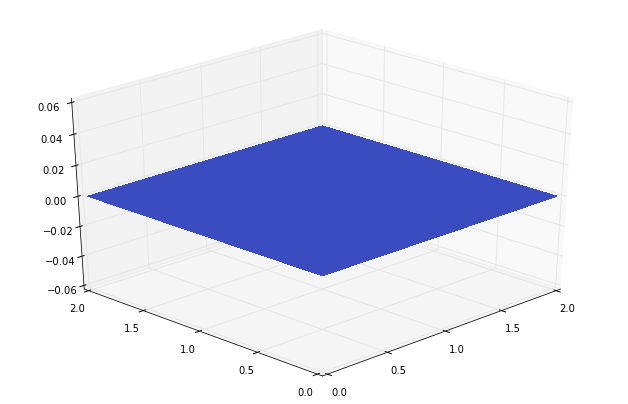

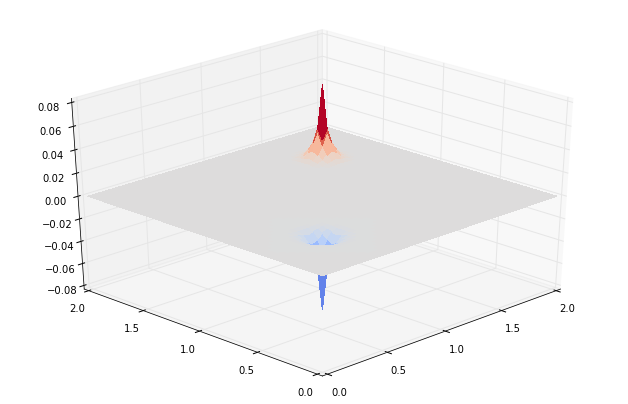

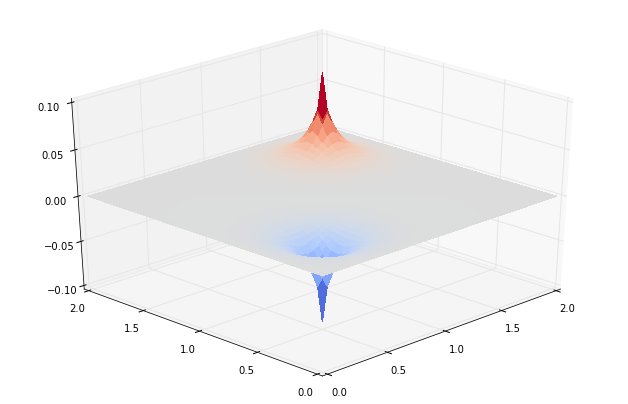

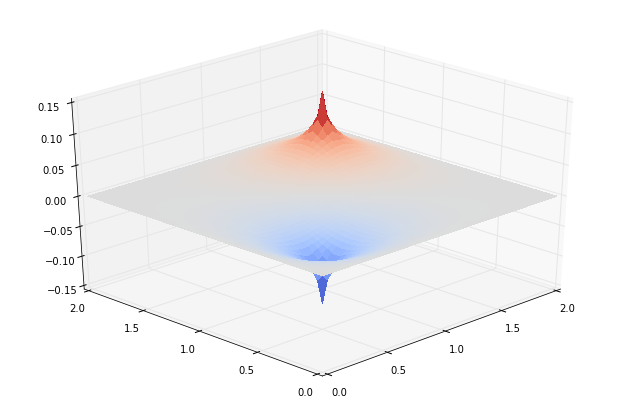

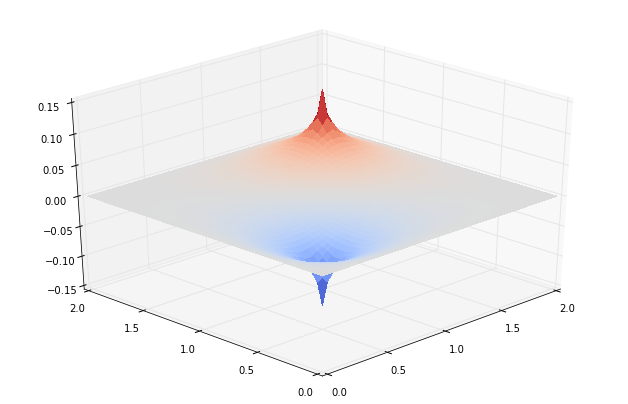

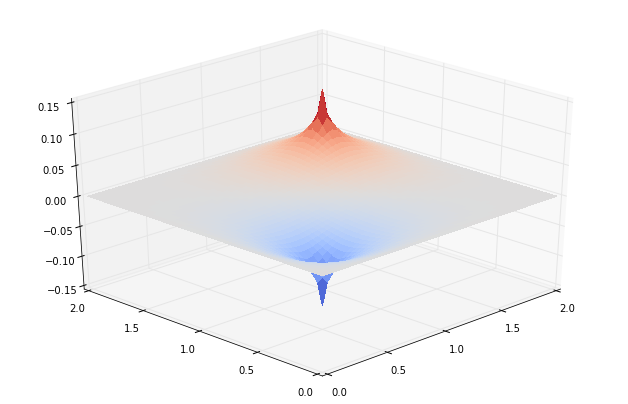

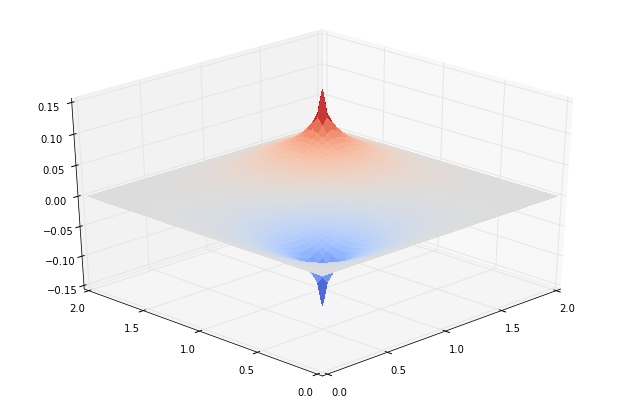

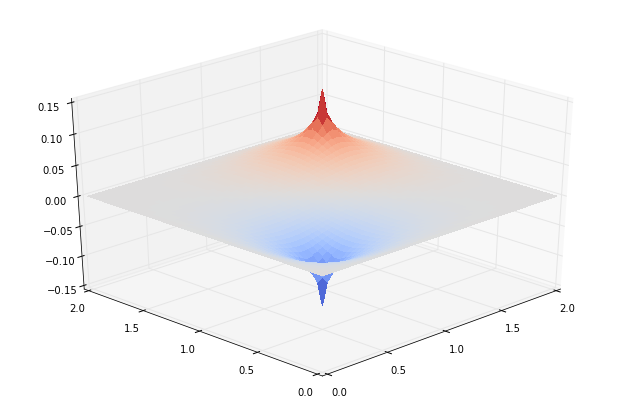

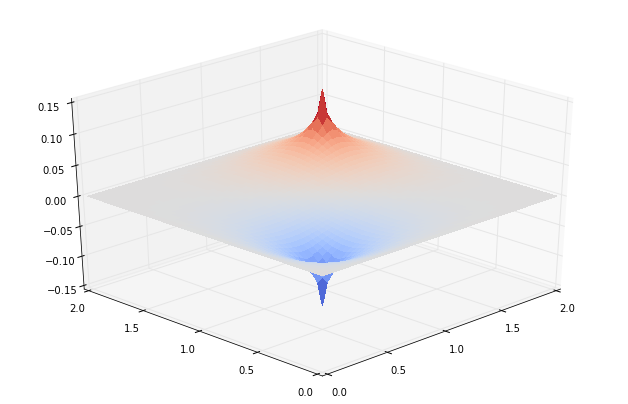

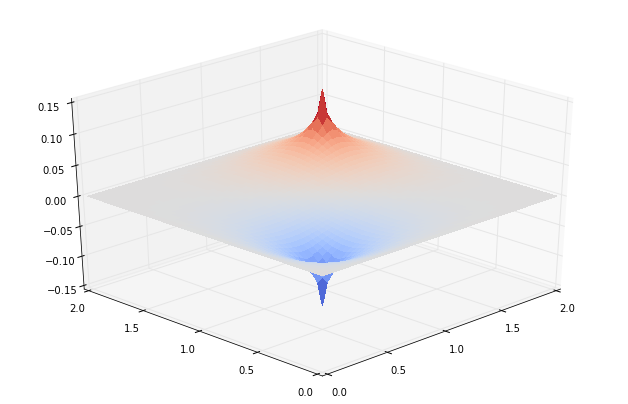

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from numba import autojit
%matplotlib inline

def plot2D(X, Y, p):
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    surf1 = ax.plot_surface(X, Y, p, rstride=1, cstride=1,
        cmap=cm.coolwarm, antialiased=False, linewidth=0)
    ax.set_xlim(0,2)
    ax.set_ylim(0,2)
    ax.view_init(30,225)

@autojit
def poisson2d_numba(p, b, dx, dy, l1norm_target):
    l1norm = 1
    pn = np.empty_like(p)
    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = (dy**2*(pn[1:-1, 2:] + pn[1:-1, :-2])+\
                         dx**2*(pn[2:,1:-1] + pn[0:-2, 1:-1])-\
                         (dx*dy)**2*b[1:-1, 1:-1])/\
                         (2*(dx**2+dy**2))
        p[:,0] = 0
        p[:,-1] = 0
        p[0,:] = 0
        p[-1,:] = 0
        l1norm = np.sum(np.abs(p)-np.abs(pn))/np.sum(np.abs(p))
    return p
   
    
def run(Nx, Ny, l1_norm_target):
    x, dx = np.linspace(0,2,Nx, retstep=True)
    y, dy = np.linspace(0,2,Ny, retstep=True)
    X, Y = np.meshgrid(x,y)
    p = np.zeros_like(X)
    b = np.zeros_like(X)
    
    b[int(Ny/4),int(Nx/4)]  = 100
    b[int(3*Ny/4),int(3*Nx/4)] = -100
    
    p[:, 0] = 0
    p[:,-1] = 0
    p[0, :] = 0
    p[-1,:] = 0
    
    plot2D(X, Y, poisson2d_numba(p, b, dx, dy, l1_norm_target))
    
for i in range(0,10):
    run(50, 50, 10**-i)